In [4]:
!pip install SimpleITK

     |████████████████████████████████| 52.4 MB 300 kB/s  eta 0:00:01     |██████▍                         | 10.5 MB 11.3 MB/s eta 0:00:04


In [3]:
# import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import os
import SimpleITK as sitk

In [2]:
dataset_dir = [os.path.join('../Task1/brain/', mri_path, 'mr.nii.gz') for mri_path in os.listdir('../Task1/brain/')]
img = nib.load(dataset_dir[0]).get_fdata()

In [9]:
np.max(img.flatten())

993.0

In [13]:
shape_list = []
for mri_img_path in dataset_dir:
    mri_img = nib.load(mri_img_path).get_fdata()
    shape_list.append((mri_img.shape, mri_img_path))
    

In [14]:
shape_list[:3]

[((212, 246, 181), '../Task1/brain/1BB033/mr.nii.gz'),
 ((190, 247, 197), '../Task1/brain/1BA076/mr.nii.gz'),
 ((220, 241, 185), '../Task1/brain/1BB145/mr.nii.gz')]

In [41]:
len(temp_img)
# len(temp_img[temp_img != 0])

9439512

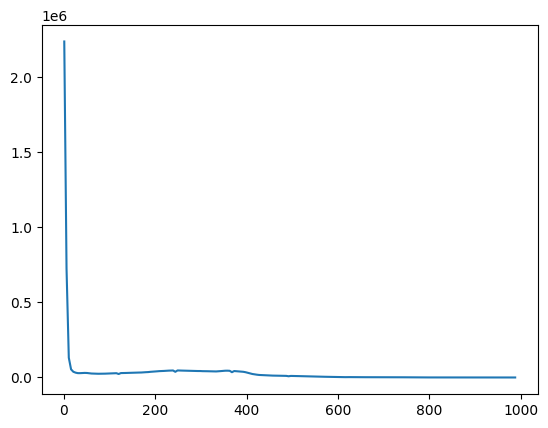

In [57]:
temp_img = img.flatten()
temp_img = temp_img[temp_img != np.min(temp_img)]
# temp_img = temp_img[temp_img >= 20]
freq, bins = np.histogram(temp_img, bins=200)
plt.plot(bins[:-1],freq)

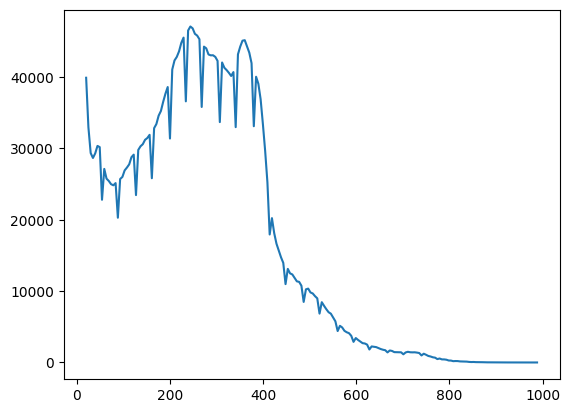

In [58]:
temp_img = temp_img[temp_img >= 20]
freq, bins = np.histogram(temp_img, bins=200)
plt.plot(bins[:-1],freq)

Some more histagram

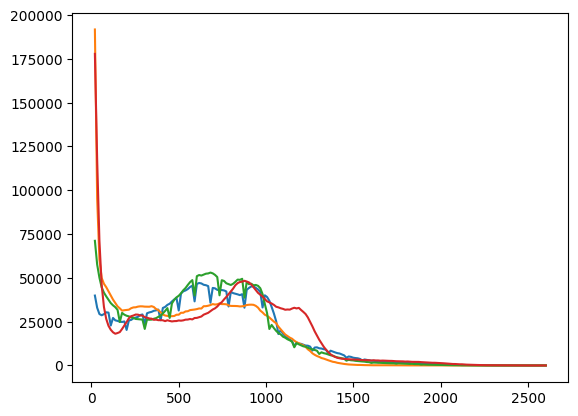

In [59]:
hist_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()
    temp_img = temp_img[temp_img != np.min(temp_img)]
    temp_img = temp_img[temp_img >= 20]
    freq, bins = np.histogram(temp_img, bins=200)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

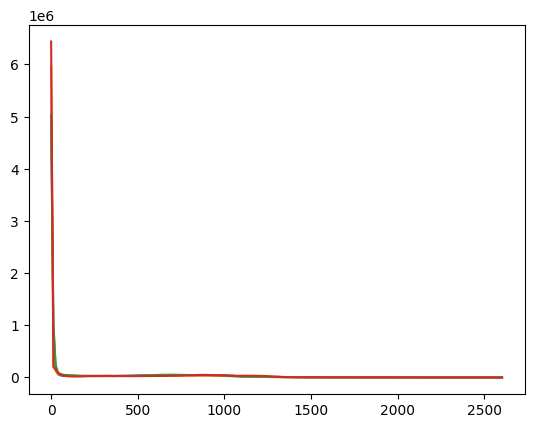

In [67]:
hist_data = []
bin_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()
    # temp_img = temp_img[temp_img >= 20]
    freq, bins = np.histogram(temp_img, bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

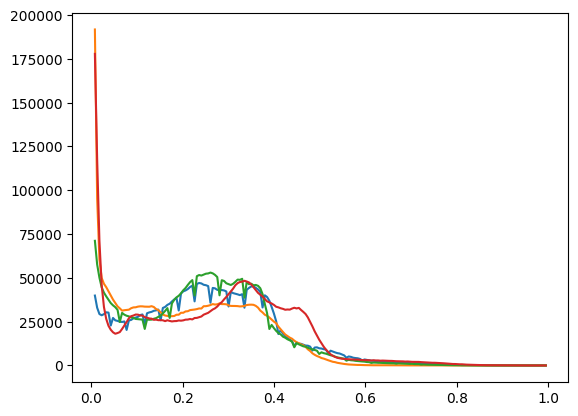

In [64]:
threshold = 20

hist_data = []
plt.figure()
for mri_img_path in dataset_dir[:4]:
    mri_img = nib.load(mri_img_path).get_fdata()
    temp_img = mri_img.flatten()

    min_val, max_val = np.min(temp_img), np.max(temp_img)
    temp_img = (temp_img - min_val) / (max_val - min_val)

    temp_img = temp_img[temp_img >= threshold / max_val]
    freq, bins = np.histogram(temp_img, bins=200)
    hist_data.append(freq)

for hist in hist_data:
    plt.plot(bins[:-1], hist)
plt.show()

In [68]:
[np.max(binss) for binss in bin_data]

[993.0, 2981.6162109375, 1002.0, 2614.65234375]

Let's see if by removing the values below 20 am i doing good or not

In [3]:
img = sitk.ReadImage(dataset_dir[1])
img = sitk.GetArrayFromImage(img)

(-0.5, 189.5, 196.5, -0.5)

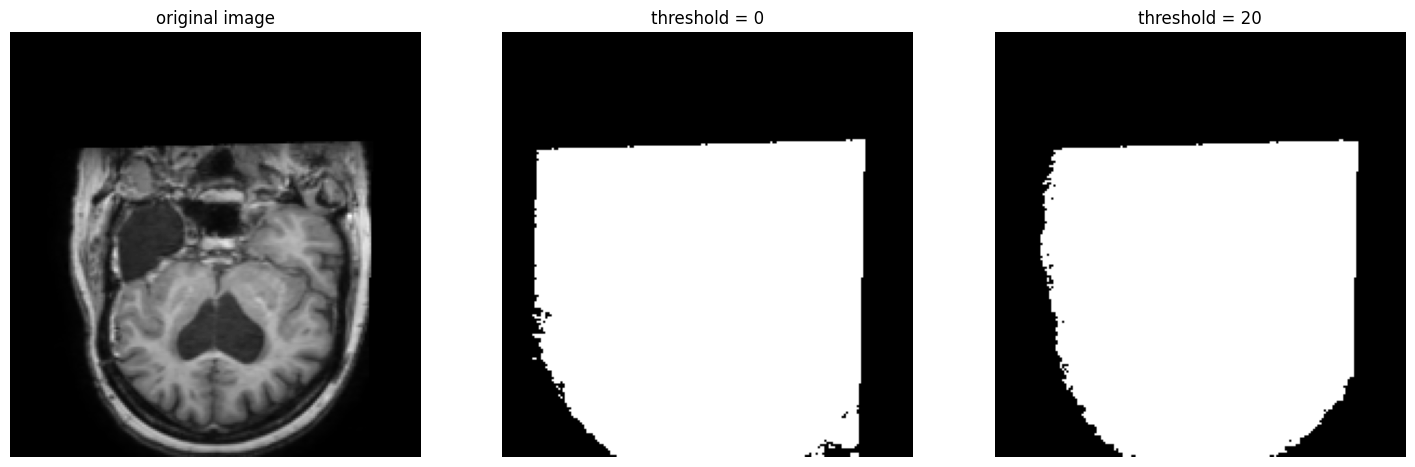

In [32]:
slice_number = 100
threshold = 20

mask1, mask2 = np.zeros_like(img, dtype=bool), np.zeros_like(img, dtype=bool)
mask1[img > 0] = 1
mask2[img > threshold] = 1

plt.figure(figsize=(18,6))
plt.subplot(1,3,1)
plt.imshow(img[:,slice_number,:], cmap='gray')
plt.axis('off')
plt.title('original image')
plt.subplot(1,3,2)
plt.imshow(mask1[:,slice_number,:], cmap='gray')
plt.title('threshold = 0')
plt.axis('off')
plt.subplot(1,3,3)
plt.imshow(mask2[:,slice_number,:], cmap='gray')
plt.title('threshold = 20')
plt.axis('off')

Let's do it more beautifully

In [ ]:
!pip install ipympl

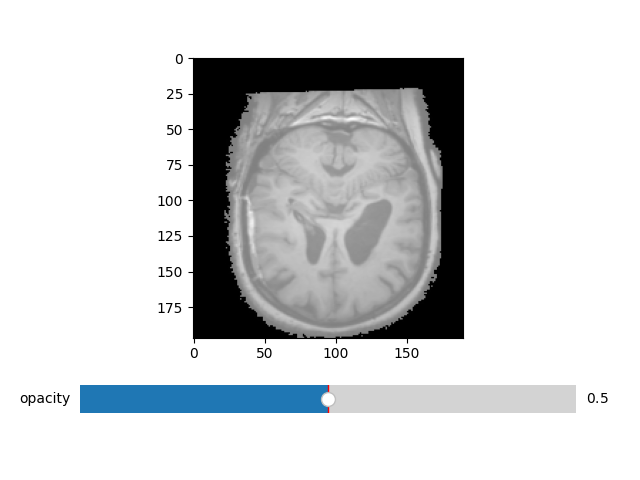

In [8]:
%matplotlib ipympl

import matplotlib.widgets as mpwidgets

OPACITY = 0.5
slice_number = 150
threshold = 30

mask = np.zeros_like(img, dtype=bool)
mask[img > threshold] = 1


# PLOT
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})
img0 = ax0.imshow(img[:,slice_number,:], cmap="gray")
# img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")
img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")


def update(value): 
    img1.set_alpha(value)    
    fig.canvas.draw_idle()

slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
slider0.on_changed(update)

plt.show()

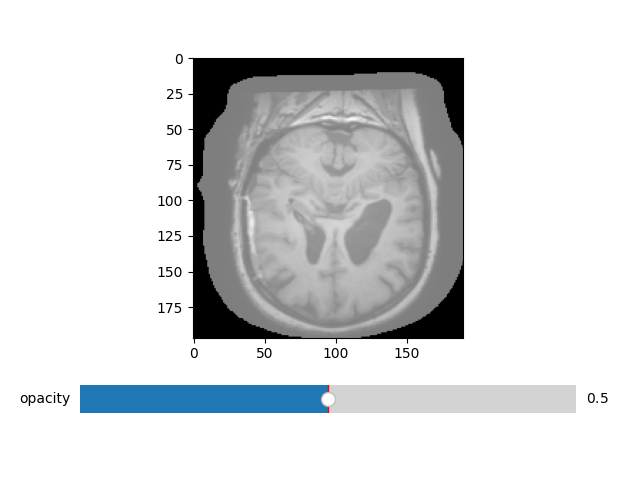

In [7]:
%matplotlib ipympl

import matplotlib.widgets as mpwidgets

OPACITY = 0.5
slice_number = 150
threshold = 30

mask = sitk.GetArrayFromImage(sitk.ReadImage('/'.join(list(np.concatenate((np.array(dataset_dir[1].split('/')[:-1]),['mask.nii.gz']))))))

# PLOT
fig, (ax0, ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [5, 1]})
img0 = ax0.imshow(img[:,slice_number,:], cmap="gray")
# img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")
img1 = ax0.imshow(mask[:,slice_number,:], alpha=OPACITY, cmap="gray")


def update(value): 
    img1.set_alpha(value)    
    fig.canvas.draw_idle()

slider0 = mpwidgets.Slider(ax=ax1, label='opacity', valmin=0, valmax=1, valinit=OPACITY)
slider0.on_changed(update)

plt.show()

It seems threshold = 30 works good

now let's do the normalization

## Histogram Normalization

Here I will normalize the histograms using z-score and I do this specific to each data subset. we have three data sources which comes from different MRI machine. 

In [4]:
dataset_dir = [os.path.join('../Task1/brain/', mri_path, 'mr.nii.gz') for mri_path in os.listdir('../Task1/brain/')]
mask_dir = [os.path.join('../Task1/brain/', mri_path, 'mask.nii.gz') for mri_path in os.listdir('../Task1/brain/')]

In [5]:
category = [dataset_dir[i].split('/')[-2][2] for i in range(len(dataset_dir))]
np.unique(np.array(category), return_counts = True)

(array(['A', 'B', 'C'], dtype='<U1'), array([60, 60, 60]))

In [52]:
list(zip(dataset_dir, mask_dir,category))[:4]

[('../Task1/brain/1BB033/mr.nii.gz', '../Task1/brain/1BB033/mask.nii.gz', 'B'),
 ('../Task1/brain/1BA076/mr.nii.gz', '../Task1/brain/1BA076/mask.nii.gz', 'A'),
 ('../Task1/brain/1BB145/mr.nii.gz', '../Task1/brain/1BB145/mask.nii.gz', 'B'),
 ('../Task1/brain/1BA294/mr.nii.gz', '../Task1/brain/1BA294/mask.nii.gz', 'A')]

In [6]:
category_dir = {'A':[], 'B':[], 'C':[]}
for dir,cat in zip(zip(dataset_dir,mask_dir), category):
    if cat == 'A':
        category_dir['A'].append(dir)
    if cat == 'B':
        category_dir['B'].append(dir)
    if cat == 'C':
        category_dir['C'].append(dir)

In [55]:
category_dir['A'][:2]

[('../Task1/brain/1BA076/mr.nii.gz', '../Task1/brain/1BA076/mask.nii.gz'),
 ('../Task1/brain/1BA294/mr.nii.gz', '../Task1/brain/1BA294/mask.nii.gz')]

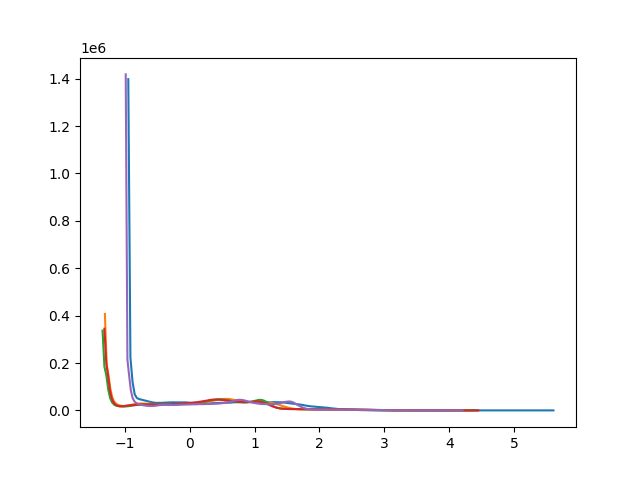

In [14]:
hist_data = []
bin_data = []

for mri_img_path,mask_path in category_dir['A'][:5]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    mri_img_masked = mri_img[mask]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

plt.figure()
for binss,hist in zip(bin_data, hist_data):
    plt.plot(binss[:-1], hist)
plt.show()


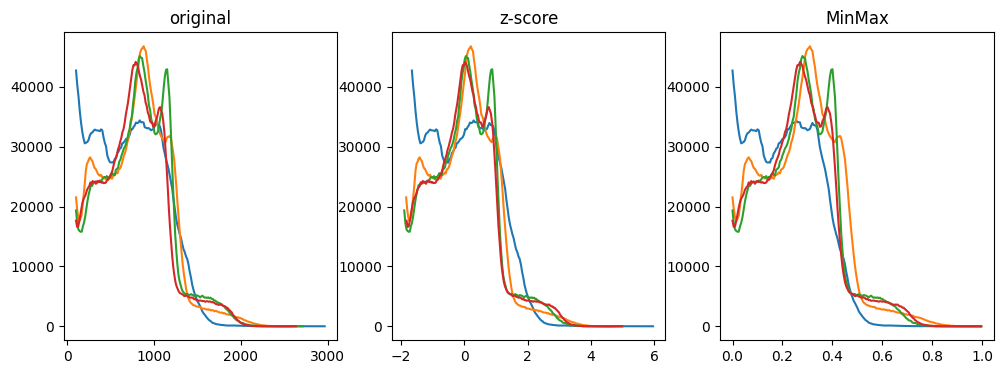

In [8]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['A'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 100
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


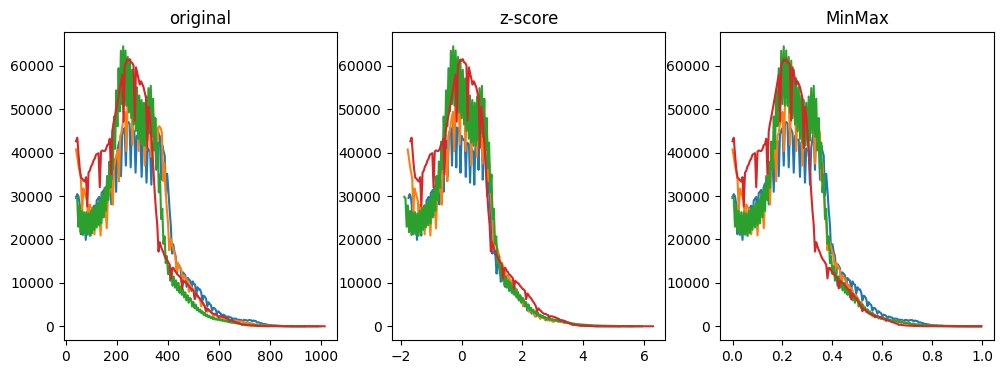

In [13]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['B'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 40
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


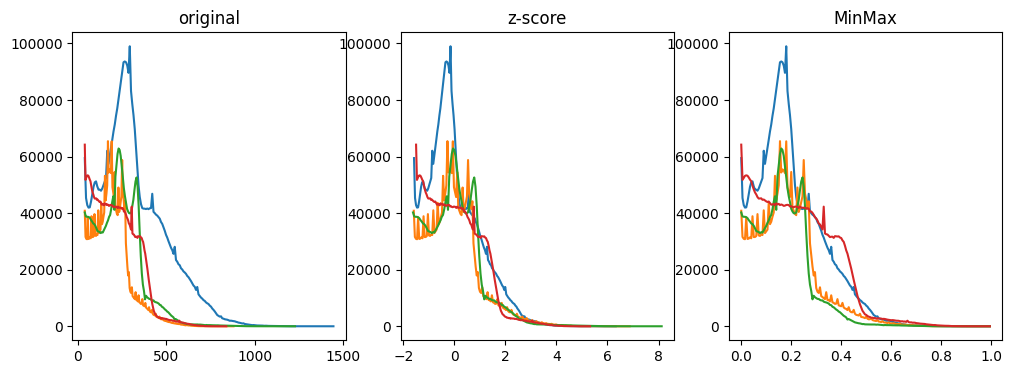

In [18]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['C'][:4]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask = sitk.ReadImage(mask_path)
    mask = sitk.GetArrayFromImage(mask).astype(bool)

    threshold = 40
    mask2 = np.zeros_like(mri_img, dtype=bool)
    mask2[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask & mask2]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    normalized_img = (mri_img_masked - img_mean) / img_var

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked.flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked)
    max_value = np.max(mri_img_masked)
    minmax_normalized = (mri_img_masked - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


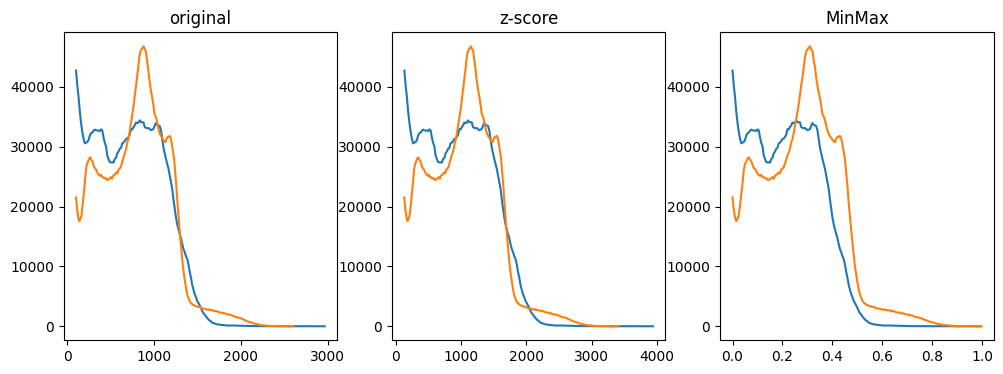

In [39]:
hist_data = []
bin_data = []

hist_data_before_norm = []
bin_data_before_norm = []

hist_data_minmax_norm = []
bin_data_minmax_norm = []

for mri_img_path,mask_path in category_dir['A'][:2]:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)

    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = 100
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    # mri_img_masked = mri_img[mask_original & mask_threshold]
    mri_img_masked = np.where(mask_original & mask_threshold, mri_img, 0)

    img_mean = np.mean(mri_img_masked[mri_img_masked != 0])
    img_var = np.std(mri_img_masked[mri_img_masked != 0])

    normalized_img = (mri_img_masked - img_mean) / img_var
    normalized_img += np.abs(np.min(normalized_img))
    normalized_img *= 500

    # getting histogram
    freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

    # for evaluation of the result
    freq, bins = np.histogram(mri_img_masked[mri_img_masked != 0].flatten(), bins=200)
    bin_data_before_norm.append(bins)
    hist_data_before_norm.append(freq)

    # also with minmax normalization for comparison
    min_value = np.min(mri_img_masked[mri_img_masked != 0])
    max_value = np.max(mri_img_masked[mri_img_masked != 0])
    minmax_normalized = (mri_img_masked[mri_img_masked != 0] - min_value) / (max_value - min_value)
    freq, bins = np.histogram(minmax_normalized.flatten(), bins=200)
    bin_data_minmax_norm.append(bins)
    hist_data_minmax_norm.append(freq)

plt.figure(figsize=(12,4))
for binss,hist in zip(bin_data_before_norm, hist_data_before_norm):
    plt.subplot(1,3,1)
    plt.plot(binss[:-1], hist)
plt.title('original')
for binss,hist in zip(bin_data, hist_data):
    plt.subplot(1,3,2)
    plt.plot(binss[:-1], hist)
plt.title('z-score')
for binss,hist in zip(bin_data_minmax_norm, hist_data_minmax_norm):
    plt.subplot(1,3,3)
    plt.plot(binss[:-1], hist)
plt.title('MinMax')
plt.show()


I guess now I know how to do this. let's build some tools to visualize what want to do and apply the normalization to see how it works in practice

In [20]:
# np.array(list(zip(dataset_dir, mask_dir,category)))[[0,1,7]]
[(category_dir[key][i],key) for key in ['A','B','C'] for i in range(1)]

[(('../Task1/brain/1BA076/mr.nii.gz', '../Task1/brain/1BA076/mask.nii.gz'),
  'A'),
 (('../Task1/brain/1BB033/mr.nii.gz', '../Task1/brain/1BB033/mask.nii.gz'),
  'B'),
 (('../Task1/brain/1BC087/mr.nii.gz', '../Task1/brain/1BC087/mask.nii.gz'),
  'C')]

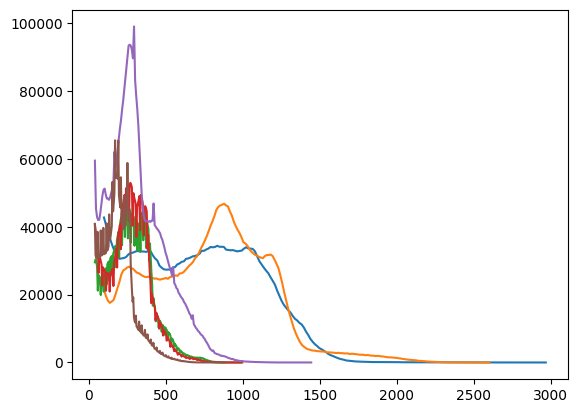

In [27]:
hist_data = []
bin_data = []
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(2)]
threshold_dict = {'A':100, 'B':40, 'C':40}

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1
    mri_img_masked = mri_img[mask_original & mask_threshold]
    normalized_img = mri_img_masked

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

plt.figure()
for binss,hist in zip(bin_data, hist_data):
    plt.plot(binss[:-1], hist)
plt.show()

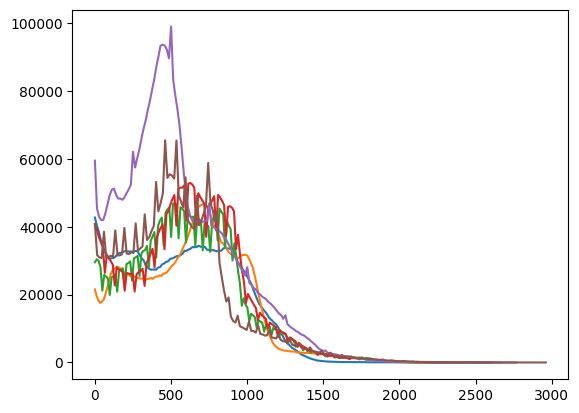

In [39]:
hist_data = []
bin_data = []
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(2)]
threshold_dict = {'A':100, 'B':40, 'C':40}

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_original & mask_threshold]
    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    # mri_img_masked = np.where(mask_original & mask_threshold, mri_img, 0)
    # img_mean = np.mean(mri_img_masked[mri_img_masked != 0])
    # img_var = np.std(mri_img_masked[mri_img_masked != 0])

    normalized_img = (mri_img_masked - img_mean) / img_var
    normalized_img += np.abs(np.min(normalized_img))
    normalized_img *= 350

    # getting histogram
    freq, bins = np.histogram(normalized_img.flatten(), bins=200)
    # freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    bin_data.append(bins)
    hist_data.append(freq)

plt.figure()
for binss,hist in zip(bin_data, hist_data):
    plt.plot(binss[:-1], hist)
plt.show()

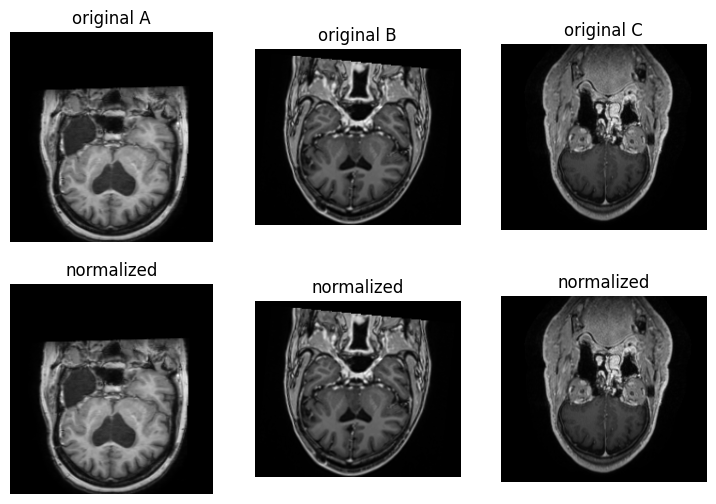

In [38]:
plt.figure(figsize=(9,6))
slice_number = 100
mixed_dir = [(category_dir[key][i],key) for key in ['A','B','C'] for i in range(1)]
threshold_dict = {'A':100, 'B':40, 'C':40}
i = 1

for (mri_img_path,mask_path),cat in mixed_dir:
    mri_img = sitk.ReadImage(mri_img_path)
    mri_img = sitk.GetArrayFromImage(mri_img)
    mask_original = sitk.ReadImage(mask_path)
    mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

    threshold = threshold_dict[cat]
    mask_threshold = np.zeros_like(mri_img, dtype=bool)
    mask_threshold[mri_img > threshold] = 1

    mri_img_masked = mri_img[mask_original & mask_threshold]

    img_mean = np.mean(mri_img_masked)
    img_var = np.std(mri_img_masked)

    # normalized_img = (mri_img_masked - img_mean) / img_var
    normalized_img = (mri_img - img_mean) / img_var
    normalized_img += np.abs(np.min(normalized_img))
    normalized_img *= 350

    # original image
    plt.subplot(2,3,i)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('original '+ str(cat))

    # normalized image
    plt.subplot(2,3,i+3)
    plt.imshow(normalized_img[:,slice_number,:], cmap='gray')
    plt.axis('off')
    plt.title('normalized')
    i += 1
    # getting histogram
    # freq, bins = np.histogram(normalized_img[normalized_img !=0].flatten(), bins=200)
    # bin_data.append(bins)
    # hist_data.append(freq)

# plt.figure()
# for binss,hist in zip(bin_data, hist_data):
#     plt.plot(binss[:-1], hist)
plt.show()

Done. it seems that it works

In [49]:
mri_img_path = dataset_dir[0]
mask_path = mask_dir[0]
mri_img = sitk.ReadImage(mri_img_path)
mri_img = sitk.GetArrayFromImage(mri_img)
mask_original = sitk.ReadImage(mask_path)
mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

mri_img_masked = mri_img[~mask_original]
np.set_printoptions(suppress=True)
np.transpose(np.unique(mri_img_masked, return_counts = True))

array([[      0., 2848034.],
       [      1.,  122842.],
       [      2.,  566079.],
       [      3.,  602547.],
       [      4.,  461058.],
       [      5.,  302807.],
       [      6.,  164073.],
       [      7.,   84423.],
       [      8.,   44787.],
       [      9.,   23971.],
       [     10.,   12550.],
       [     11.,    6297.],
       [     12.,    3359.],
       [     13.,    1737.],
       [     14.,     926.],
       [     15.,     538.],
       [     16.,     307.],
       [     17.,     240.],
       [     18.,     167.],
       [     19.,     140.],
       [     20.,      74.],
       [     21.,      78.],
       [     22.,      59.],
       [     23.,      60.],
       [     24.,      32.],
       [     25.,      33.],
       [     26.,      24.],
       [     27.,      21.],
       [     28.,      27.],
       [     29.,      12.],
       [     30.,      15.],
       [     31.,      12.],
       [     32.,       8.],
       [     33.,       5.],
       [     3

In [51]:
mri_img = np.where(~mask_original, 0, mri_img)  
mri_img_masked = mri_img[~mask_original]
np.set_printoptions(suppress=True)
np.transpose(np.unique(mri_img_masked, return_counts = True))

array([[      0., 5247376.]])

## Script for Normalization

In [55]:
threshold_dict = {'A':100, 'B':40, 'C':40}
NORMALIZATION_FACTOR = 350

for cat in ['A','B','C']:
    for mri_img_path, mask_path in category_dir[cat][:1]:

        # read MRI and its mask
        mri_img_sitk = sitk.ReadImage(mri_img_path)
        mri_img = sitk.GetArrayFromImage(mri_img_sitk)
        mask_original = sitk.ReadImage(mask_path)
        mask_original = sitk.GetArrayFromImage(mask_original).astype(bool)

        # create the threshold mask
        threshold = threshold_dict[cat]
        mask_threshold = np.zeros_like(mri_img, dtype=bool)
        mask_threshold[mri_img > threshold] = 1

        # apply the mask and create a 1-D array of intersting voxels
        mri_img_masked = mri_img[mask_original & mask_threshold]

        # calculate mean and standard deviation
        img_mean = np.mean(mri_img_masked)
        img_var = np.std(mri_img_masked)

        # zero out the voxel outside the original mask (filter out non-interesting values) and normalize the image
        normalized_img = np.where(~mask_original, 0, mri_img)   
        normalized_img = (mri_img - img_mean) / img_var
        normalized_img += np.abs(np.min(normalized_img))
        normalized_img *= NORMALIZATION_FACTOR

        # convert back to SITK
        normalized_img_sitk = sitk.GetImageFromArray(normalized_img)
        normalized_img_sitk.CopyInformation(mri_img_sitk)
